<a href="https://colab.research.google.com/github/ahmedmoheb1/ML-Projects/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as ltb

In [ ]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()
print(test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e 27.00  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e 19.00  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e 31.00  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e 38.00  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e 20.00  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0         0.00       0.00          0.00    0.00    0.00   Nelly Carsoning  
1         0.00       9.00          0.00 2823.00    0.00    Lerome Peckers  
2         0.00       0.00          0.00    0.00    0.00   Sabih Unhearfus  
3         0.00    6652.00          0.00  181.00  585.00  Meratz Caltilter  
4        10.00       0.00        635.00    0.00    0.00   Brence Harperez  


In [ ]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [ ]:
print(train.isnull().sum().sort_values(ascending=False))
print('________'*50)
print(test.isnull().sum().sort_values(ascending=False))

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64
________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [ ]:
print('Categorical Variables :')
cat_vars=train.select_dtypes(include='O')
for col in cat_vars:
  print(col)

Categorical Variables :
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [ ]:
print('Numerical Variables :')
num_vars=train._get_numeric_data()
for col in num_vars:
  print(col)

Numerical Variables :
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


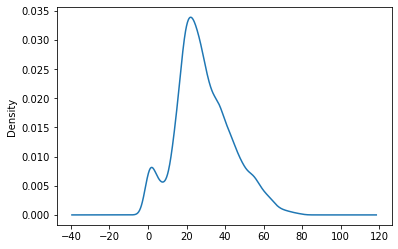

In [ ]:
train['Age'].plot.density()

In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace = True)
test['Age'].fillna(train['Age'].mean(),inplace = True)

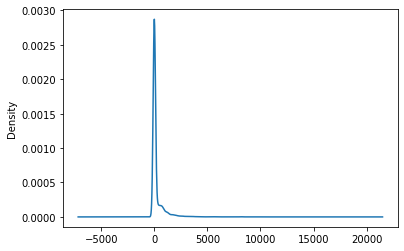

In [ ]:
train['RoomService'].plot.density()


In [ ]:
train['RoomService'].fillna(train['RoomService'].median(),inplace = True)
test['RoomService'].fillna(test['RoomService'].median(),inplace = True)

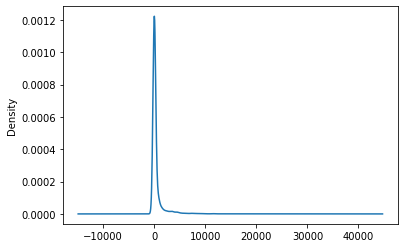

In [ ]:
train['FoodCourt'].plot.density()

In [ ]:
train['FoodCourt'].fillna(train['FoodCourt'].median(),inplace = True)
test['FoodCourt'].fillna(test['FoodCourt'].median(),inplace = True)

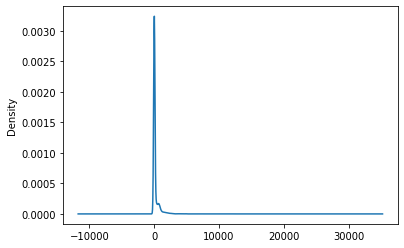

In [ ]:
train['ShoppingMall'].plot.density()

In [ ]:
train['ShoppingMall'].fillna(train['ShoppingMall'].median(),inplace = True)
test['ShoppingMall'].fillna(test['ShoppingMall'].median(),inplace = True)

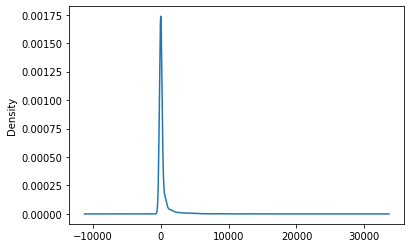

In [ ]:
train['Spa'].plot.density()

In [ ]:
train['Spa'].fillna(train['Spa'].median(),inplace = True)
test['Spa'].fillna(test['Spa'].median(),inplace = True)

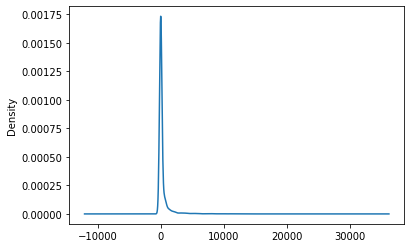

In [ ]:
train['VRDeck'].plot.density()

In [ ]:
train['VRDeck'].fillna(train['VRDeck'].median(),inplace = True)
test['VRDeck'].fillna(test['VRDeck'].median(),inplace = True)

In [ ]:
print(train.isnull().sum().sort_values(ascending = False))
print('----'*50)
test.isnull().sum().sort_values(ascending = False)

CryoSleep       217
VIP             203
HomePlanet      201
Name            200
Cabin           199
Destination     182
PassengerId       0
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


Cabin           100
Name             94
CryoSleep        93
VIP              93
Destination      92
HomePlanet       87
PassengerId       0
Age               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [ ]:
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])
test['Cabin']=test['Cabin'].fillna(test['Cabin'].mode()[0])
train['CryoSleep']=train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
test['CryoSleep']=test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
train['VIP']=train['VIP'].fillna(train['VIP'].mode()[0])
test['VIP']=test['VIP'].fillna(test['VIP'].mode()[0])
train['Destination']=train['Destination'].fillna(train['Destination'].mode()[0])
test['Destination']=test['Destination'].fillna(test['Destination'].mode()[0])
train['HomePlanet']=train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
test['HomePlanet']=test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB
None


In [ ]:
train[['Group','Member']]=train['PassengerId'].str.split('_',expand = True)
test[['Group','Member']]=test['PassengerId'].str.split('_',expand = True)
train[['Deck','Num','Size']]=train['Cabin'].str.split('/',expand = True)
test[['Deck','Num','Size']]=test['Cabin'].str.split('/',expand = True)

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Deck,Num,Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True,0004,01,F,1,S


In [ ]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Group,Member,Deck,Num,Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning,0013,01,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers,0018,01,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus,0019,01,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter,0021,01,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez,0023,01,F,5,S


In [ ]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Group            object
Member           object
Deck             object
Num              object
Size             object
dtype: object

In [ ]:
train.drop(columns = ['PassengerId','Cabin','Name','Destination','HomePlanet'],inplace = True)

In [ ]:
Passenger_id= test['PassengerId']

In [ ]:
test.drop(columns = ['PassengerId','Cabin','Name','Destination','HomePlanet'],inplace = True)

In [ ]:
train['Deck']=train['Deck'].map({'B':0,'F':1,'A':2,'G':3,'E':4,'D':5,'C':6,'T':7})
test['Deck']=test['Deck'].map({'B':0,'F':1,'A':2,'G':3,'E':4,'D':5,'C':6,'T':7})
train['Size']=train['Size'].map({'P':0,'S':1})
test['Size']=test['Size'].map({'P':0,'S':1})
train['Group']=train['Group'].astype(int)
test['Group']=train['Group'].astype(int)

train['Num']=train['Num'].astype(int)
test['Num']=test['Num'].astype(int)

train['Member']=train['Member'].astype(int)
test['Member']=test['Member'].astype(int)


In [ ]:
print(train['Group'].unique())
print('---'*50)
print(train['Member'].unique())
print('---'*50)
print(train['Deck'].unique())
print('---'*50)
print(train['Num'].unique())
print('---'*50)
print(train['Size'].unique())

[   1    2    3 ... 9278 9279 9280]
------------------------------------------------------------------------------------------------------------------------------------------------------
[1 2 3 4 5 6 7 8]
------------------------------------------------------------------------------------------------------------------------------------------------------
[0 1 2 3 4 5 6 7]
------------------------------------------------------------------------------------------------------------------------------------------------------
[   0    1    2 ... 1892 1893 1894]
------------------------------------------------------------------------------------------------------------------------------------------------------
[0 1]


In [ ]:
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Member,Deck,Num,Size
0,False,39.00,False,0.00,0.00,0.00,0.00,0.00,False,1,1,0,0,0
1,False,24.00,False,109.00,9.00,25.00,549.00,44.00,True,2,1,1,0,1
2,False,58.00,True,43.00,3576.00,0.00,6715.00,49.00,False,3,1,2,0,1
3,False,33.00,False,0.00,1283.00,371.00,3329.00,193.00,False,3,2,2,0,1
4,False,16.00,False,303.00,70.00,151.00,565.00,2.00,True,4,1,1,1,1


In [ ]:
train['CryoSleep']=train['CryoSleep'].map({True:1,False:0})
test['CryoSleep']=test['CryoSleep'].map({True:1,False:0})
train['VIP']=train['VIP'].map({True:1,False:0})
test['VIP']=test['VIP'].map({True:1,False:0})


In [ ]:
Scaler = MinMaxScaler()
train['Age']=Scaler.fit_transform(train['Age'].to_numpy().reshape(-1,1))
train['FoodCourt']=Scaler.fit_transform(train['FoodCourt'].to_numpy().reshape(-1,1))
train['ShoppingMall']=Scaler.fit_transform(train['ShoppingMall'].to_numpy().reshape(-1,1))
train['Spa']=Scaler.fit_transform(train['Spa'].to_numpy().reshape(-1,1))
train['RoomService']=Scaler.fit_transform(train['RoomService'].to_numpy().reshape(-1,1))
train['VRDeck']=Scaler.fit_transform(train['VRDeck'].to_numpy().reshape(-1,1))
test['Age']=Scaler.fit_transform(test['Age'].to_numpy().reshape(-1,1))
test['FoodCourt']=Scaler.fit_transform(test['FoodCourt'].to_numpy().reshape(-1,1))
test['ShoppingMall']=Scaler.fit_transform(test['ShoppingMall'].to_numpy().reshape(-1,1))
test['Spa']=Scaler.fit_transform(test['Spa'].to_numpy().reshape(-1,1))
test['RoomService']=Scaler.fit_transform(test['RoomService'].to_numpy().reshape(-1,1))
test['VRDeck']=Scaler.fit_transform(test['VRDeck'].to_numpy().reshape(-1,1))


In [ ]:
print(train.dtypes)
print('---'*50)
print(test.dtypes)

CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
Group             int64
Member            int64
Deck              int64
Num               int64
Size              int64
dtype: object
------------------------------------------------------------------------------------------------------------------------------------------------------
CryoSleep         int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Group             int64
Member            int64
Deck              int64
Num               int64
Size              int64
dtype: object


In [ ]:
y=train['Transported']
train=train.drop(columns=['Transported'],inplace=True)
x=train

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [ ]:
X_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group,Member,Deck,Num,Size
2714,0,0.00,0,0.00,0.00,0.00,0.00,0.00,2908,1,3,464,1
1626,0,0.19,0,0.02,0.00,0.00,0.00,0.03,1721,1,1,341,0
8304,0,0.30,0,0.00,0.03,0.00,0.00,0.00,8863,1,4,582,1
1221,0,0.34,0,0.00,0.01,0.00,0.02,0.00,1300,1,1,251,1
1766,0,0.62,0,0.00,0.00,0.00,0.03,0.00,1878,1,1,375,0


In [ ]:
log_model= LogisticRegression().fit(X_train,y_train)
print(log_model.score(X_test,y_test))

0.7096032202415181


In [ ]:
naive_model= GaussianNB().fit(X_train,y_train)
print(naive_model.score(X_test,y_test))

0.7481311098332375


In [ ]:
clf = LazyClassifier ()

In [ ]:
models,predictions = clf.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:19<00:00,  1.47it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.79,0.79,0.79,0.30
SVC,0.79,0.79,0.79,0.79,3.58
ExtraTreesClassifier,0.79,0.79,0.79,0.79,0.82
XGBClassifier,0.79,0.79,0.79,0.79,0.50
NuSVC,0.79,0.79,0.79,0.79,3.25
SGDClassifier,0.79,0.79,0.79,0.79,0.07
LogisticRegression,0.78,0.78,0.78,0.78,0.06
AdaBoostClassifier,0.78,0.78,0.78,0.78,0.49
RandomForestClassifier,0.78,0.78,0.78,0.78,1.20


In [ ]:
svm_model= SVC().fit(X_train,y_train)
print(svm_model.score(X_test,y_test))

0.5480161012075906


In [ ]:
dec_tree_model= DecisionTreeClassifier().fit(X_train,y_train)
print(dec_tree_model.score(X_test,y_test))

0.7320299022426682


In [ ]:
rand_for_model= RandomForestClassifier().fit(X_train,y_train)
print(rand_for_model.score(X_test,y_test))

0.7740080506037953


In [ ]:
grad_boost_model= GradientBoostingClassifier().fit(X_train,y_train)
print(grad_boost_model.score(X_test,y_test))

0.7843588269120184


In [ ]:
knn_model=KNeighborsClassifier().fit(X_train,y_train)
print(knn_model.score(X_test,y_test))

0.5543415756181713


In [ ]:
LGBM_model = ltb.LGBMClassifier().fit(X_train, y_train)
print(LGBM_model.score(X_test,y_test))
    

0.78953421506613


In [ ]:
y_predicted = LGBM_model.predict(test)

In [ ]:
submission=pd.DataFrame({'PassengerId':Passenger_id,'Transported':y_predicted})

In [ ]:
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [ ]:
submission.to_csv('submission.csv',index = False)